In [17]:
!pip install pyDes
!pip install pillow

El texto codificado en base 64 es:
b'Tx19ih0T1725fcMhnNsgUuCP7H7H6NemGsHdUSh2TRJREgjNmX0zQ8YZr848Idd21RS+ZVs1/Smq9htd7D3YPYcwHs7/GHXXYth1yRwncXsO4NrDDBFDR+BbyxIEEI2fOls1bpwgvXy8mX/HnxqOr++ArP3P1HMn6HX8tZ9EZ8M069xnsgL1rdoDc32R551e+rLMa8pnX+po+hLr5SvpaeSnom95d5ZGnHgK1HQNALzb74ELVcLR+ZNerWsu1JvhDg6qzFfoj9Tq2LjC7FeWR/bb+vGOCyqu52OOq6Y0L+NcRFkGBqBbhRK6rs/tJLlv4UWmOfJPvBTvpUIE94/JMRMxQgLre40J/F+55BLeSRL4WnjVlp+dj4vmRoKbAcGd/+8PHRQV+6+bksJukqImUSP3HPQ+r7aB7/ask/E52p6BSwVrfzz2xtxDEKq2kL+TO/PQzUXUPw/gCiYsGksezHN1tXoSkR67pSSH6x+rWg/hJzViSZC/5FDDwc5WYycO6kvjm2ijRTFJzOUr/LvY8wrFLiHQD40XuPBUqz1rLRmdWpROdNlNAkb3cwZemLF5jdPxsWd26TUg5eMTOOCQqw4vjgipOYqp6qpQijWg940RJGiGeo3FQhbJeaW6/S10WzKDxvFFxsymXpKrYvUThSA20QWM1yDN6K8Se36bhwyCXzg16WONgkv5WWEis2sRd/BSs+UCGS5NB9KNlUk6/DZYvKsBbIjvhS7lyQ1xXZcHFYLrlSyizjHqPnMzAcmm28lF6gWWa4pQKSEZoDM7wU8vAKfzMmcuDlusIkWqWk4z3AkfxDqD+60RuH+ydtkmGOsms8esEhWh62wliyLUciMYiCGEqX+YarxcMuMusa3VtjA8n+rszPNPqZRwlCpTgXj/eCytv8lKrywjZU5G8xloQo7CbhxC6li3i8q0r0lciSDxZSVDTktyam6ixqgV2+N

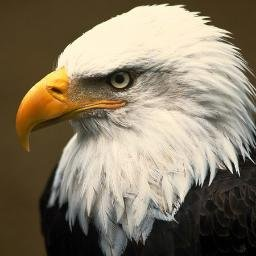

In [18]:
import cv2
import pyDes
import base64
import os
import io
import PIL.Image as Image
import numpy as np
from google.colab.patches import cv2_imshow #patch for cv2.imshow()

#se convierte la imagen a bytes, la libreria pyDes recibe bytes desde python3
with open("eagle256.jpg", "rb") as image: 
  f = image.read()
  b = bytearray(f)
#llave <NAPOLEON> debe ser de exactamente 8 bytes de longitud
k = pyDes.des(b"NAPOLEON", pyDes.CBC, b"\0\0\0\0\0\0\0\0", pad=None, padmode=pyDes.PAD_PKCS5) 

encryption = k.encrypt(b)
encryptionb64 = base64.b64encode(encryption)
print('El texto codificado en base 64 es:')
print(encryptionb64)
print('')
print('Imagen resultante')
decryptionb64 = base64.b64decode(encryptionb64)
decryption = k.decrypt(decryptionb64)

#se crea un ndarray que guarda el desencripatdo en bytes
nparr = np.frombuffer(decryption, np.uint8) 
#imagen resultante del arreglo anterior
img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR) 
# cv2.imshow(img_np) es la funcion original, pero genera errores en colab
cv2_imshow(img_np)
